In [1]:
# 실장님께서 Port Congestion에서 가장 중요한 변수는 LA 경로 뿐이라고 말씀해주셔서 학습 변수에 LA 경로만 넣는 것으로 수정
# 로스앤젤레스는 west Coast North America에 위치하기 때문에 port congestion에서는 이것만 사용
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Merge한 데이터 불러오기
data_df =  pd.read_csv('data(20160101~20220107).csv')
print(data_df)
data_df.head()

           Date  SCFI Comprehensive Container Freight Rate Index  \
0    2016-01-01                                           836.96   
1    2016-01-08                                           745.91   
2    2016-01-15                                           680.22   
3    2016-01-22                                           615.77   
4    2016-01-29                                           591.51   
..          ...                                              ...   
302  2021-12-10                                          4810.98   
303  2021-12-17                                          4894.62   
304  2021-12-24                                          4956.02   
305  2021-12-31                                          5046.66   
306  2022-01-07                                          5109.60   

     Shanghai-Europe (base port)  SCFI Shanghai-Med (base port)  \
0                         1232.0                         1257.0   
1                          932.0                 

,Date,SCFI Comprehensive Container Freight Rate Index,Shanghai-Europe (base port),SCFI Shanghai-Med (base port),SCFI Shanghai-WC America (base port),SCFI Shanghai-EC America (base port),SCFI Shanghai-Persian Gulf (Dubai),SCFI Shanghai-ANZ (Melbourne),SCFI Shanghai-W Africa (Lagos),SCFI Shanghai-S Africa (Durban),...,"Containership 13,000/13,500 TEU G'less Newbuilding Prices",5 Year $10m Finance based on Libor 1st yr,"Port Congestion Index - Containerships In Port, m.TEU, 7dma","Port Congestion Index - Containerships In Port, East Coast North America, m.TEU, 7dma","Port Congestion Index - Containerships In Port, West Coast North America, m.TEU, 7dma","Port Congestion Index - Containerships In Port, United Kingdom/Continent, m.TEU, 7dma","Port Congestion Index - Containerships In Port, Mediterranean/Black Sea, m.TEU, 7dma","Port Congestion Index - Containerships In Port, East Asia, m.TEU, 7dma","Port Congestion Index - Containerships In Port, South East Asia, m.TEU, 7dma","Port Congestion Index - Containerships In Port, China P.R., m.TEU, 7dma"
0,2016-01-01,836.96,1232.0,1257.0,1518.0,2555.0,580.0,625.0,1486.0,517.0,...,99.0,2.06,6.30,0.37,0.27,0.68,0.57,2.56,0.75,1.87
1,2016-01-08,745.91,932.0,1022.0,1498.0,2542.0,462.0,743.0,1470.0,523.0,...,99.0,2.09,6.35,0.36,0.32,0.69,0.63,2.49,0.76,1.75
2,2016-01-15,680.22,740.0,869.0,1417.0,2457.0,385.0,640.0,1431.0,549.0,...,99.0,2.09,6.03,0.33,0.27,0.68,0.63,2.34,0.70,1.63
3,2016-01-22,615.77,545.0,629.0,1377.0,2420.0,306.0,563.0,1358.0,530.0,...,99.0,2.09,6.14,0.32,0.27,0.71,0.62,2.36,0.78,1.64
4,2016-01-29,591.51,469.0,488.0,1388.0,2466.0,278.0,525.0,1321.0,502.0,...,99.0,2.09,6.32,0.33,0.29,0.69,0.68,2.49,0.72,1.80


In [3]:
# 2019년 12월 31일 중국 우한에서 첫 확진자가 보고
Corona_data_df=data_df.query('"2019-12-31"<= Date')
print(Corona_data_df.shape)
Corona_data_df.head()

(104, 32)


,Date,SCFI Comprehensive Container Freight Rate Index,Shanghai-Europe (base port),SCFI Shanghai-Med (base port),SCFI Shanghai-WC America (base port),SCFI Shanghai-EC America (base port),SCFI Shanghai-Persian Gulf (Dubai),SCFI Shanghai-ANZ (Melbourne),SCFI Shanghai-W Africa (Lagos),SCFI Shanghai-S Africa (Durban),...,"Containership 13,000/13,500 TEU G'less Newbuilding Prices",5 Year $10m Finance based on Libor 1st yr,"Port Congestion Index - Containerships In Port, m.TEU, 7dma","Port Congestion Index - Containerships In Port, East Coast North America, m.TEU, 7dma","Port Congestion Index - Containerships In Port, West Coast North America, m.TEU, 7dma","Port Congestion Index - Containerships In Port, United Kingdom/Continent, m.TEU, 7dma","Port Congestion Index - Containerships In Port, Mediterranean/Black Sea, m.TEU, 7dma","Port Congestion Index - Containerships In Port, East Asia, m.TEU, 7dma","Port Congestion Index - Containerships In Port, South East Asia, m.TEU, 7dma","Port Congestion Index - Containerships In Port, China P.R., m.TEU, 7dma"
203,2020-01-03,1022.72,1124.0,1185.0,1636.0,2808.0,1218.0,949.0,2744.0,1159.0,...,98.0,2.19,7.68,0.51,0.32,0.73,0.77,2.83,1.01,2.27
204,2020-01-10,1002.58,1058.0,1179.0,1543.0,2888.0,1175.0,937.0,2873.0,1150.0,...,98.0,2.19,7.75,0.51,0.35,0.78,0.79,2.83,0.99,2.21
205,2020-01-17,990.68,1010.0,1180.0,1562.0,2943.0,1123.0,949.0,2897.0,1084.0,...,98.0,2.19,7.71,0.53,0.31,0.77,0.78,2.88,0.91,2.27
206,2020-01-24,981.19,969.0,1179.0,1545.0,2951.0,1126.0,942.0,2908.0,1087.0,...,98.0,2.18,7.90,0.48,0.37,0.79,0.78,2.99,0.95,2.36
207,2020-02-14,910.58,850.0,1031.0,1423.0,2768.0,1089.0,892.0,2983.0,1066.0,...,98.0,2.17,7.73,0.46,0.37,0.80,0.81,2.79,0.95,2.26


In [4]:
X = Corona_data_df.iloc[:,[15,16,17,20,21,22,26]]
print(X.shape)
X.head()

(104, 7)


,Clarksons Average Containership Earnings,"HSFO 380cst Bunker Prices (3.5% Sulphur), Rotterdam",Total Containerships - % Idle/Laid Up/Scrubber Retrofit,"Containership 13,000/14,000 TEU Newbuilding Prices","Containership 3,500/4,000 TEU (Wide Beam) G'less Newbuilding Prices","Containership 13,000/13,500 TEU G'less Newbuilding Prices","Port Congestion Index - Containerships In Port, West Coast North America, m.TEU, 7dma"
203,15285.0,289.25,6.8,109.0,41.5,98.0,0.32
204,15268.0,297.25,7.0,109.0,41.5,98.0,0.35
205,15250.0,299.00,7.0,109.0,41.5,98.0,0.31
206,15161.0,301.00,6.7,109.0,41.5,98.0,0.37
207,14823.0,289.25,8.5,109.0,41.5,98.0,0.37


In [5]:
# Y데이터 불러오기
y = Corona_data_df.iloc[:, [1]]
y.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')
y.head()

,index,SCFI Comprehensive Container Freight Rate Index
0,203,1022.72
1,204,1002.58
2,205,990.68
3,206,981.19
4,207,910.58


In [6]:
# 전처리 - MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
data_to_use = Corona_data_df.iloc[:,[1,15,16,17,20,21,22,26]]
data_to_use.head()

,SCFI Comprehensive Container Freight Rate Index,Clarksons Average Containership Earnings,"HSFO 380cst Bunker Prices (3.5% Sulphur), Rotterdam",Total Containerships - % Idle/Laid Up/Scrubber Retrofit,"Containership 13,000/14,000 TEU Newbuilding Prices","Containership 3,500/4,000 TEU (Wide Beam) G'less Newbuilding Prices","Containership 13,000/13,500 TEU G'less Newbuilding Prices","Port Congestion Index - Containerships In Port, West Coast North America, m.TEU, 7dma"
203,1022.72,15285.0,289.25,6.8,109.0,41.5,98.0,0.32
204,1002.58,15268.0,297.25,7.0,109.0,41.5,98.0,0.35
205,990.68,15250.0,299.00,7.0,109.0,41.5,98.0,0.31
206,981.19,15161.0,301.00,6.7,109.0,41.5,98.0,0.37
207,910.58,14823.0,289.25,8.5,109.0,41.5,98.0,0.37


In [7]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_to_use)

data_df_scaled = pd.DataFrame(data_scaled)
data_df_scaled.columns = data_to_use.columns
data_df_scaled.head(5)

,SCFI Comprehensive Container Freight Rate Index,Clarksons Average Containership Earnings,"HSFO 380cst Bunker Prices (3.5% Sulphur), Rotterdam",Total Containerships - % Idle/Laid Up/Scrubber Retrofit,"Containership 13,000/14,000 TEU Newbuilding Prices","Containership 3,500/4,000 TEU (Wide Beam) G'less Newbuilding Prices","Containership 13,000/13,500 TEU G'less Newbuilding Prices","Port Congestion Index - Containerships In Port, West Coast North America, m.TEU, 7dma"
0,0.047667,0.084985,0.452856,0.380282,0.152174,0.15,0.064516,0.1250
1,0.042974,0.084745,0.474880,0.408451,0.152174,0.15,0.064516,0.1625
2,0.040201,0.084491,0.479697,0.408451,0.152174,0.15,0.064516,0.1125
3,0.037990,0.083235,0.485203,0.366197,0.152174,0.15,0.064516,0.1875
4,0.021536,0.078463,0.452856,0.619718,0.152174,0.15,0.064516,0.1875


In [8]:
# y값을 스케일링하지 않았을 때

scaler = MinMaxScaler()
data_without_y_scaled = scaler.fit_transform(X)
data_df_scaled2 = pd.DataFrame(data_without_y_scaled)
data_df_scaled2.columns = X.columns
data_df_scaled2.head(5)

,Clarksons Average Containership Earnings,"HSFO 380cst Bunker Prices (3.5% Sulphur), Rotterdam",Total Containerships - % Idle/Laid Up/Scrubber Retrofit,"Containership 13,000/14,000 TEU Newbuilding Prices","Containership 3,500/4,000 TEU (Wide Beam) G'less Newbuilding Prices","Containership 13,000/13,500 TEU G'less Newbuilding Prices","Port Congestion Index - Containerships In Port, West Coast North America, m.TEU, 7dma"
0,0.084985,0.452856,0.380282,0.152174,0.15,0.064516,0.1250
1,0.084745,0.474880,0.408451,0.152174,0.15,0.064516,0.1625
2,0.084491,0.479697,0.408451,0.152174,0.15,0.064516,0.1125
3,0.083235,0.485203,0.366197,0.152174,0.15,0.064516,0.1875
4,0.078463,0.452856,0.619718,0.152174,0.15,0.064516,0.1875


In [9]:
# y값을 스케일링하지 않았을 때 2

data_df_scaled = pd.concat([y,data_df_scaled2], axis=1)
data_df_scaled.drop('index',axis=1, inplace=True)
data_df_scaled


,SCFI Comprehensive Container Freight Rate Index,Clarksons Average Containership Earnings,"HSFO 380cst Bunker Prices (3.5% Sulphur), Rotterdam",Total Containerships - % Idle/Laid Up/Scrubber Retrofit,"Containership 13,000/14,000 TEU Newbuilding Prices","Containership 3,500/4,000 TEU (Wide Beam) G'less Newbuilding Prices","Containership 13,000/13,500 TEU G'less Newbuilding Prices","Port Congestion Index - Containerships In Port, West Coast North America, m.TEU, 7dma"
0,1022.72,0.084985,0.452856,0.380282,0.152174,0.15,0.064516,0.1250
1,1002.58,0.084745,0.474880,0.408451,0.152174,0.15,0.064516,0.1625
2,990.68,0.084491,0.479697,0.408451,0.152174,0.15,0.064516,0.1125
3,981.19,0.083235,0.485203,0.366197,0.152174,0.15,0.064516,0.1875
4,910.58,0.078463,0.452856,0.619718,0.152174,0.15,0.064516,0.1875
...,...,...,...,...,...,...,...,...
99,4810.98,0.927509,0.794907,0.056338,1.000000,1.00,1.000000,0.7875
100,4894.62,0.923739,0.786648,0.014085,1.000000,1.00,1.000000,0.7250
101,4956.02,0.923739,0.819683,0.056338,1.000000,1.00,1.000000,0.7250
102,5046.66,0.923739,0.876118,0.140845,1.000000,1.00,1.000000,0.6875


In [10]:
# 코로나 이후의 데이터는 총 104주인데 80개까지 학습하고 나머지 20개에 대해서 TEST를 진행

TEST_SIZE = 20

train = data_df_scaled[:-TEST_SIZE]
test = data_df_scaled[-TEST_SIZE:]

In [11]:
# 학습을 시킬 데이터셋 생성

# window_size를 정의하여 학습 데이터를 생성할 예정입니다. window_size는 내가 얼마동안(기간)의 다음날 데이터를를 예측할 것인가를 정하는 parameter
# => 일단 3달로 해볼까? 3달 = 12주 = window_size = 12

def make_dataset(data, label, window_size=12):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [12]:
feature_cols = X.columns
label_cols = y.columns[1]

train_feature = train[feature_cols]
train_label = train[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label,12)
print(train_feature.shape, train_label.shape)
# train, validation set 생성
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_feature, train_label, test_size=0.5)
print(X_train.shape, X_test.shape)


(72, 12, 7) (72,)
(36, 12, 7) (36, 12, 7)


In [13]:
label_cols

'SCFI Comprehensive Container Freight Rate Index'

In [14]:
# test dataset (실제 예측 해볼 데이터)
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label,12)


In [15]:
test_feature

array([[[0.93689649, 0.75017206, 0.09859155, 0.84782609, 0.75      ,
         0.87096774, 0.7125    ],
        [0.94778079, 0.76187199, 0.05633803, 0.86956522, 0.8       ,
         0.89247312, 0.6875    ],
        [0.95524874, 0.77838954, 0.11267606, 0.89130435, 0.85      ,
         0.91397849, 0.7       ],
        [0.95780394, 0.80523056, 0.08450704, 0.89130435, 0.85      ,
         0.92473118, 0.7       ],
        [0.95910272, 0.8128011 , 0.05633803, 0.90217391, 0.85      ,
         0.93010753, 0.725     ],
        [0.96530013, 0.86854783, 0.05633803, 0.91304348, 0.85      ,
         0.93548387, 0.7125    ],
        [0.96623186, 0.94975912, 0.05633803, 0.92391304, 0.85      ,
         0.94623656, 0.8       ],
        [0.97120108, 1.        , 0.04225352, 0.92391304, 0.85      ,
         0.94623656, 0.7875    ],
        [0.97120108, 0.98210599, 0.05633803, 0.92391304, 0.85      ,
         0.94623656, 0.8125    ],
        [0.9670083 , 0.91878871, 0.04225352, 0.92391304, 0.85      ,
    

In [259]:
# 모델 생성 
# 일단 베껴옴 (https://teddylee777.github.io/tensorflow/LSTM%EC%9C%BC%EB%A1%9C-%EC%98%88%EC%B8%A1%ED%95%B4%EB%B3%B4%EB%8A%94-%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90-%EC%A3%BC%EA%B0%80)

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(10, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=True)
          )

model.add(LSTM(10, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
         )
model.add(Dropout(0.4))
model.add(Dense(1))
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_55 (LSTM)               (None, 12, 10)            720       
_________________________________________________________________
lstm_56 (LSTM)               (None, 10)                840       
_________________________________________________________________
dropout_7 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 11        
Total params: 1,571
Trainable params: 1,571
Non-trainable params: 0
_________________________________________________________________


In [260]:
import os
model_path = 'C:/Users/hyunj/KMI'
# 모델의 학습
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=3)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(X_train, y_train, 
                    epochs=1000, 
                    batch_size=4,
                    validation_data=(X_test, y_test)
                 #  callbacks=[early_stop, checkpoint]
                    )

Epoch 1/1000
9/9 [==============================] - 13s 343ms/step - loss: 7836059.5000 - val_loss: 6017524.0000
Epoch 2/1000
9/9 [==============================] - 0s 13ms/step - loss: 6036794.9500 - val_loss: 6017423.0000
Epoch 3/1000
9/9 [==============================] - 0s 15ms/step - loss: 5947957.2250 - val_loss: 6017343.5000
Epoch 4/1000
9/9 [==============================] - 0s 15ms/step - loss: 6441199.5500 - val_loss: 6017287.0000
Epoch 5/1000
9/9 [==============================] - 0s 21ms/step - loss: 7143610.4000 - val_loss: 6017239.5000
Epoch 6/1000
9/9 [==============================] - 0s 15ms/step - loss: 5823766.9000 - val_loss: 6017188.0000
Epoch 7/1000
9/9 [==============================] - 0s 13ms/step - loss: 5849066.7000 - val_loss: 6017136.0000
Epoch 8/1000
9/9 [==============================] - 0s 12ms/step - loss: 7015934.8000 - val_loss: 6017068.0000
Epoch 9/1000
9/9 [==============================] - 0s 14ms/step - loss: 6732565.1000 - val_loss: 6016967.5000

9/9 [==============================] - 0s 12ms/step - loss: 1083366.6938 - val_loss: 457865.5312
Epoch 75/1000
9/9 [==============================] - 0s 13ms/step - loss: 1758683.4625 - val_loss: 771707.8750
Epoch 76/1000
9/9 [==============================] - 0s 14ms/step - loss: 3966061.2750 - val_loss: 630495.6250
Epoch 77/1000
9/9 [==============================] - 0s 12ms/step - loss: 1581578.3750 - val_loss: 423799.2812
Epoch 78/1000
9/9 [==============================] - 0s 12ms/step - loss: 1239070.7875 - val_loss: 449106.3750
Epoch 79/1000
9/9 [==============================] - 0s 11ms/step - loss: 1322652.4812 - val_loss: 866139.5000
Epoch 80/1000
9/9 [==============================] - 0s 12ms/step - loss: 1539693.2875 - val_loss: 760756.2500
Epoch 81/1000
9/9 [==============================] - 0s 12ms/step - loss: 2395775.0625 - val_loss: 572291.0000
Epoch 82/1000
9/9 [==============================] - 0s 12ms/step - loss: 1434216.8125 - val_loss: 730172.5625
Epoch 83/1000
9

9/9 [==============================] - 0s 15ms/step - loss: 1664345.1875 - val_loss: 210377.4688
Epoch 148/1000
9/9 [==============================] - 0s 16ms/step - loss: 1077885.1438 - val_loss: 147490.2188
Epoch 149/1000
9/9 [==============================] - 0s 14ms/step - loss: 1703412.6844 - val_loss: 696310.7500
Epoch 150/1000
9/9 [==============================] - 0s 15ms/step - loss: 2044218.5875 - val_loss: 1120264.0000
Epoch 151/1000
9/9 [==============================] - 0s 14ms/step - loss: 1878145.2875 - val_loss: 702557.1875
Epoch 152/1000
9/9 [==============================] - 0s 14ms/step - loss: 780201.3063 - val_loss: 299369.0000
Epoch 153/1000
9/9 [==============================] - 0s 14ms/step - loss: 944178.0437 - val_loss: 172572.1875
Epoch 154/1000
9/9 [==============================] - ETA: 0s - loss: 2113530.097 - 0s 14ms/step - loss: 2118938.1625 - val_loss: 297115.7812
Epoch 155/1000
9/9 [==============================] - 0s 14ms/step - loss: 1033102.4156 - 

9/9 [==============================] - 0s 12ms/step - loss: 1891619.8313 - val_loss: 157418.4688
Epoch 221/1000
9/9 [==============================] - 0s 13ms/step - loss: 2463935.2625 - val_loss: 422873.0938
Epoch 222/1000
9/9 [==============================] - 0s 13ms/step - loss: 937901.2500 - val_loss: 550398.8125
Epoch 223/1000
9/9 [==============================] - 0s 13ms/step - loss: 1170169.4000 - val_loss: 329644.1562
Epoch 224/1000
9/9 [==============================] - 0s 14ms/step - loss: 958482.3648 - val_loss: 358685.8750
Epoch 225/1000
9/9 [==============================] - 0s 12ms/step - loss: 888646.1250 - val_loss: 435239.3750
Epoch 226/1000
9/9 [==============================] - 0s 12ms/step - loss: 1357657.3203 - val_loss: 338569.1250
Epoch 227/1000
9/9 [==============================] - 0s 13ms/step - loss: 1214976.7125 - val_loss: 309998.2812
Epoch 228/1000
9/9 [==============================] - 0s 14ms/step - loss: 1219898.4563 - val_loss: 238310.9219
Epoch 229/

9/9 [==============================] - 0s 13ms/step - loss: 588185.1469 - val_loss: 414096.2812
Epoch 294/1000
9/9 [==============================] - 0s 21ms/step - loss: 1090418.8844 - val_loss: 337285.6250
Epoch 295/1000
9/9 [==============================] - 0s 13ms/step - loss: 831073.7250 - val_loss: 269503.0000
Epoch 296/1000
9/9 [==============================] - 0s 12ms/step - loss: 1321501.1125 - val_loss: 209773.4844
Epoch 297/1000
9/9 [==============================] - 0s 12ms/step - loss: 1340257.3687 - val_loss: 457124.1562
Epoch 298/1000
9/9 [==============================] - 0s 12ms/step - loss: 1260877.1656 - val_loss: 405442.5938
Epoch 299/1000
9/9 [==============================] - 0s 13ms/step - loss: 788518.4359 - val_loss: 216469.6562
Epoch 300/1000
9/9 [==============================] - 0s 12ms/step - loss: 734728.9125 - val_loss: 271870.4062
Epoch 301/1000
9/9 [==============================] - 0s 12ms/step - loss: 1206644.1687 - val_loss: 378007.7188
Epoch 302/1

9/9 [==============================] - 0s 13ms/step - loss: 1266822.4500 - val_loss: 511354.2188
Epoch 367/1000
9/9 [==============================] - 0s 13ms/step - loss: 904197.4406 - val_loss: 259641.1719
Epoch 368/1000
9/9 [==============================] - 0s 12ms/step - loss: 1435796.7000 - val_loss: 139763.5938
Epoch 369/1000
9/9 [==============================] - 0s 12ms/step - loss: 1231201.8313 - val_loss: 279168.8125
Epoch 370/1000
9/9 [==============================] - 0s 13ms/step - loss: 1322604.4438 - val_loss: 362195.9688
Epoch 371/1000
9/9 [==============================] - 0s 13ms/step - loss: 1394974.9000 - val_loss: 396508.7500
Epoch 372/1000
9/9 [==============================] - 0s 12ms/step - loss: 1590690.7406 - val_loss: 216224.6719
Epoch 373/1000
9/9 [==============================] - 0s 12ms/step - loss: 1455761.0719 - val_loss: 94316.8359
Epoch 374/1000
9/9 [==============================] - 0s 11ms/step - loss: 890109.3125 - val_loss: 73655.4375
Epoch 375/1

9/9 [==============================] - 0s 13ms/step - loss: 1329207.6000 - val_loss: 169547.0781
Epoch 440/1000
9/9 [==============================] - 0s 17ms/step - loss: 873143.6438 - val_loss: 212700.4062
Epoch 441/1000
9/9 [==============================] - 0s 14ms/step - loss: 1482145.6375 - val_loss: 231103.2656
Epoch 442/1000
9/9 [==============================] - 0s 14ms/step - loss: 1236087.2688 - val_loss: 489525.0000
Epoch 443/1000
9/9 [==============================] - 0s 15ms/step - loss: 835055.1000 - val_loss: 504479.8438
Epoch 444/1000
9/9 [==============================] - 0s 15ms/step - loss: 1200771.6000 - val_loss: 90397.1797
Epoch 445/1000
9/9 [==============================] - 0s 15ms/step - loss: 1537294.7969 - val_loss: 177422.9219
Epoch 446/1000
9/9 [==============================] - 0s 13ms/step - loss: 1088085.1500 - val_loss: 331222.5000
Epoch 447/1000
9/9 [==============================] - 0s 13ms/step - loss: 1398262.5188 - val_loss: 451767.6250
Epoch 448/

9/9 [==============================] - 0s 12ms/step - loss: 1316943.1687 - val_loss: 187680.0938
Epoch 513/1000
9/9 [==============================] - 0s 13ms/step - loss: 1172813.4187 - val_loss: 296377.1250
Epoch 514/1000
9/9 [==============================] - 0s 12ms/step - loss: 1095418.0000 - val_loss: 150156.4062
Epoch 515/1000
9/9 [==============================] - 0s 13ms/step - loss: 1540955.8125 - val_loss: 82429.6875
Epoch 516/1000
9/9 [==============================] - 0s 13ms/step - loss: 1087641.1594 - val_loss: 173583.7344
Epoch 517/1000
9/9 [==============================] - 0s 13ms/step - loss: 1314172.3062 - val_loss: 486664.2188
Epoch 518/1000
9/9 [==============================] - 0s 12ms/step - loss: 1141408.7250 - val_loss: 514082.0625
Epoch 519/1000
9/9 [==============================] - 0s 12ms/step - loss: 890660.7891 - val_loss: 333128.0938
Epoch 520/1000
9/9 [==============================] - 0s 13ms/step - loss: 1614117.0188 - val_loss: 303845.5000
Epoch 521

9/9 [==============================] - 0s 13ms/step - loss: 992924.2125 - val_loss: 217166.1562
Epoch 586/1000
9/9 [==============================] - 0s 13ms/step - loss: 950777.8469 - val_loss: 281177.2188
Epoch 587/1000
9/9 [==============================] - 0s 12ms/step - loss: 488651.3906 - val_loss: 234765.6094
Epoch 588/1000
9/9 [==============================] - 0s 13ms/step - loss: 1013296.5687 - val_loss: 114867.4375
Epoch 589/1000
9/9 [==============================] - 0s 12ms/step - loss: 1262691.3098 - val_loss: 156232.2500
Epoch 590/1000
9/9 [==============================] - 0s 12ms/step - loss: 1655924.1750 - val_loss: 333525.2812
Epoch 591/1000
9/9 [==============================] - 0s 12ms/step - loss: 964547.6312 - val_loss: 224668.0312
Epoch 592/1000
9/9 [==============================] - 0s 12ms/step - loss: 1094526.5250 - val_loss: 89719.9531
Epoch 593/1000
9/9 [==============================] - 0s 12ms/step - loss: 1104113.6438 - val_loss: 592522.1250
Epoch 594/10

9/9 [==============================] - 0s 13ms/step - loss: 1089031.2207 - val_loss: 396878.7812
Epoch 659/1000
9/9 [==============================] - 0s 12ms/step - loss: 1064426.3750 - val_loss: 330503.2812
Epoch 660/1000
9/9 [==============================] - 0s 13ms/step - loss: 900591.9766 - val_loss: 224492.1875
Epoch 661/1000
9/9 [==============================] - 0s 13ms/step - loss: 763020.2625 - val_loss: 217234.8125
Epoch 662/1000
9/9 [==============================] - 0s 13ms/step - loss: 1130144.1562 - val_loss: 306926.1562
Epoch 663/1000
9/9 [==============================] - 0s 15ms/step - loss: 2550762.9750 - val_loss: 242774.3281
Epoch 664/1000
9/9 [==============================] - 0s 13ms/step - loss: 1101360.4062 - val_loss: 133974.6094
Epoch 665/1000
9/9 [==============================] - 0s 13ms/step - loss: 1471178.1562 - val_loss: 237555.5781
Epoch 666/1000
9/9 [==============================] - 0s 12ms/step - loss: 1092232.2812 - val_loss: 303103.5938
Epoch 667

9/9 [==============================] - 0s 13ms/step - loss: 1180902.5469 - val_loss: 82973.6562
Epoch 732/1000
9/9 [==============================] - 0s 13ms/step - loss: 2468983.5625 - val_loss: 29147.7402
Epoch 733/1000
9/9 [==============================] - 0s 13ms/step - loss: 1224963.8422 - val_loss: 87696.8359
Epoch 734/1000
9/9 [==============================] - 0s 13ms/step - loss: 852087.3078 - val_loss: 227241.6094
Epoch 735/1000
9/9 [==============================] - 0s 12ms/step - loss: 2248129.0688 - val_loss: 147623.3594
Epoch 736/1000
9/9 [==============================] - 0s 13ms/step - loss: 1505589.7500 - val_loss: 113952.0859
Epoch 737/1000
9/9 [==============================] - 0s 13ms/step - loss: 1076576.4000 - val_loss: 142757.3594
Epoch 738/1000
9/9 [==============================] - 0s 13ms/step - loss: 1173599.5719 - val_loss: 242211.9688
Epoch 739/1000
9/9 [==============================] - 0s 15ms/step - loss: 785425.5906 - val_loss: 97704.9766
Epoch 740/100

9/9 [==============================] - 0s 15ms/step - loss: 607027.9156 - val_loss: 184382.9375
Epoch 805/1000
9/9 [==============================] - 0s 12ms/step - loss: 894186.8500 - val_loss: 351954.9375
Epoch 806/1000
9/9 [==============================] - 0s 12ms/step - loss: 1152411.1750 - val_loss: 175853.3906
Epoch 807/1000
9/9 [==============================] - 0s 13ms/step - loss: 2116889.7750 - val_loss: 257284.4688
Epoch 808/1000
9/9 [==============================] - 0s 16ms/step - loss: 883590.4812 - val_loss: 348531.6875
Epoch 809/1000
9/9 [==============================] - 0s 15ms/step - loss: 603541.7656 - val_loss: 174462.0312
Epoch 810/1000
9/9 [==============================] - 0s 14ms/step - loss: 1268751.1750 - val_loss: 81552.1172
Epoch 811/1000
9/9 [==============================] - 0s 16ms/step - loss: 1203915.4000 - val_loss: 354131.1875
Epoch 812/1000
9/9 [==============================] - 0s 15ms/step - loss: 1345733.5125 - val_loss: 348087.6250
Epoch 813/10

9/9 [==============================] - 0s 13ms/step - loss: 765532.3547 - val_loss: 383920.0000
Epoch 878/1000
9/9 [==============================] - 0s 13ms/step - loss: 986160.1188 - val_loss: 345755.4375
Epoch 879/1000
9/9 [==============================] - 0s 13ms/step - loss: 2333443.3625 - val_loss: 288175.8750
Epoch 880/1000
9/9 [==============================] - 0s 13ms/step - loss: 1315666.5875 - val_loss: 128563.7500
Epoch 881/1000
9/9 [==============================] - 0s 13ms/step - loss: 1152681.6687 - val_loss: 124111.8203
Epoch 882/1000
9/9 [==============================] - 0s 13ms/step - loss: 1329989.4445 - val_loss: 183033.9375
Epoch 883/1000
9/9 [==============================] - 0s 14ms/step - loss: 1172907.3125 - val_loss: 83532.5312
Epoch 884/1000
9/9 [==============================] - 0s 13ms/step - loss: 1433191.4563 - val_loss: 157316.0781
Epoch 885/1000
9/9 [==============================] - 0s 12ms/step - loss: 862655.0594 - val_loss: 191297.5312
Epoch 886/1

9/9 [==============================] - 0s 14ms/step - loss: 1656482.1438 - val_loss: 208404.1094
Epoch 951/1000
9/9 [==============================] - 0s 14ms/step - loss: 1305003.4625 - val_loss: 145799.6719
Epoch 952/1000
9/9 [==============================] - 0s 13ms/step - loss: 1119733.0500 - val_loss: 202846.1719
Epoch 953/1000
9/9 [==============================] - 0s 13ms/step - loss: 1553892.6750 - val_loss: 359378.8750
Epoch 954/1000
9/9 [==============================] - 0s 12ms/step - loss: 1728507.5719 - val_loss: 262624.3750
Epoch 955/1000
9/9 [==============================] - 0s 12ms/step - loss: 692669.2141 - val_loss: 175427.6875
Epoch 956/1000
9/9 [==============================] - 0s 12ms/step - loss: 1113507.3938 - val_loss: 211991.0625
Epoch 957/1000
9/9 [==============================] - 0s 12ms/step - loss: 624024.0719 - val_loss: 303684.7812
Epoch 958/1000
9/9 [==============================] - 0s 12ms/step - loss: 1367098.3125 - val_loss: 262094.4219
Epoch 959

In [261]:
# weight 로딩
#model.load_weights(filename)

# 예측
pred = model.predict(test_feature)

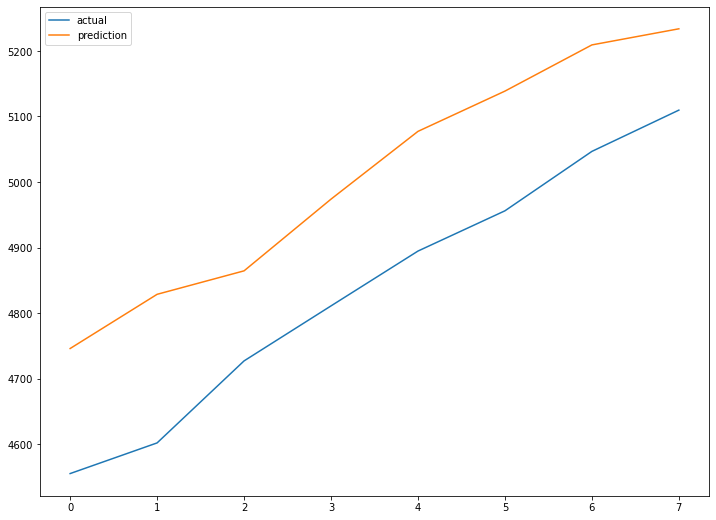

In [262]:
# 실제 데이터와 예측한 데이터 시각화

plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [263]:
pred

array([[4745.953 ],
       [4828.637 ],
       [4864.4365],
       [4973.838 ],
       [5077.197 ],
       [5138.6113],
       [5209.0913],
       [5233.6646]], dtype=float32)

In [264]:
test_label

array([4555.21, 4601.97, 4727.06, 4810.98, 4894.62, 4956.02, 5046.66,
       5109.6 ])

In [265]:
# Mape 정의
# MAPE는 퍼센트 값을 가지며 0에 가까울수록 회귀 모형의 성능이 좋다고 해석할 수 있음
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape 
    
MAPE(test_label, pred)

5.290998886264863

In [266]:
print('MAPE : ', MAPE(test_label, pred))


MAPE :  5.290998886264863


In [267]:
# RMSE는 MSE에 ROOT값을 씌운 것

from sklearn.metrics import mean_squared_error
def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))
print('RMSE : ', RMSE(test_label, pred)) 

# 머지 왜 이리 낮지...

RMSE :  173.78355061412725


In [268]:
print('MSE : ', mean_squared_error(test_label, pred))

MSE :  30200.72246405293
